---Processing Fold: 1
0.5 0.01
0.5 0.03
0.5 0.05
1.0 0.01
1.0 0.03
1.0 0.05
1.5 0.01
1.5 0.03
1.5 0.05
2.0 0.01
2.0 0.03
2.0 0.05
---Processing Fold: 2
0.5 0.01
0.5 0.03
0.5 0.05
1.0 0.01
1.0 0.03
1.0 0.05
1.5 0.01
1.5 0.03
1.5 0.05
2.0 0.01
2.0 0.03
2.0 0.05
---Processing Fold: 3
0.5 0.01
0.5 0.03
0.5 0.05
1.0 0.01
1.0 0.03
1.0 0.05
1.5 0.01
1.5 0.03
1.5 0.05
2.0 0.01
2.0 0.03
2.0 0.05
---Processing Fold: 4
0.5 0.01
0.5 0.03
0.5 0.05
1.0 0.01
1.0 0.03
1.0 0.05
1.5 0.01
1.5 0.03
1.5 0.05
2.0 0.01
2.0 0.03
2.0 0.05
---Processing Fold: 5
0.5 0.01
0.5 0.03
0.5 0.05
1.0 0.01
1.0 0.03
1.0 0.05
1.5 0.01
1.5 0.03
1.5 0.05
2.0 0.01
2.0 0.03
2.0 0.05
---Processing Fold: 6
0.5 0.01
0.5 0.03
0.5 0.05
1.0 0.01
1.0 0.03
1.0 0.05
1.5 0.01
1.5 0.03
1.5 0.05
2.0 0.01
2.0 0.03
2.0 0.05
---Processing Fold: 7
0.5 0.01
0.5 0.03
0.5 0.05
1.0 0.01
1.0 0.03
1.0 0.05
1.5 0.01
1.5 0.03
1.5 0.05
2.0 0.01
2.0 0.03
2.0 0.05
---Processing Fold: 8
0.5 0.01
0.5 0.03
0.5 0.05
1.0 0.01
1.0 0.03
1.0 0.05
1.5 0.01
1.5 0

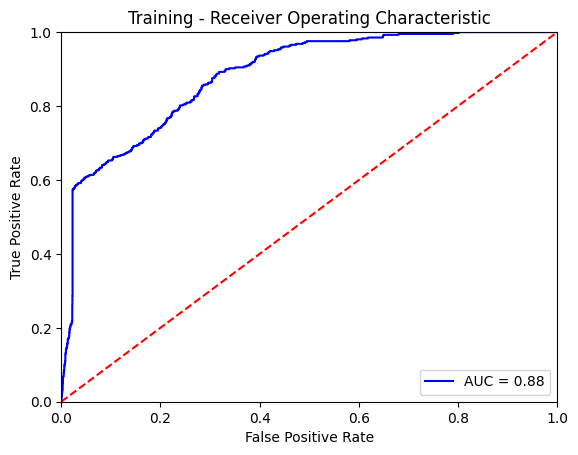

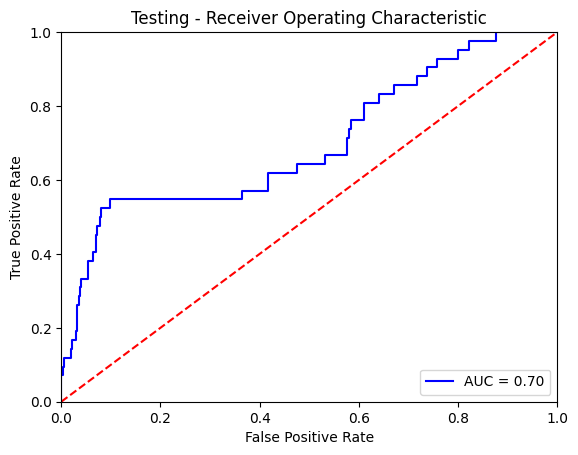

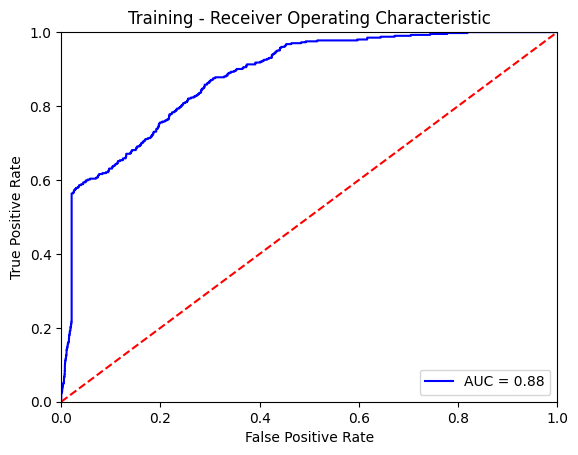

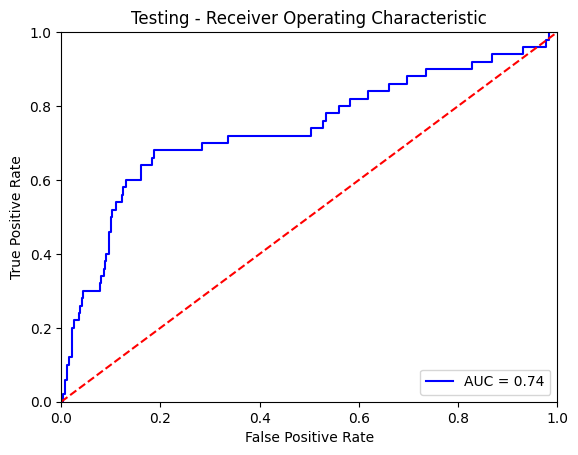

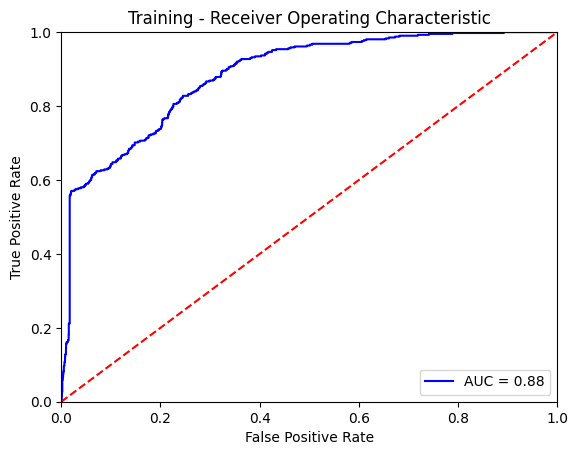

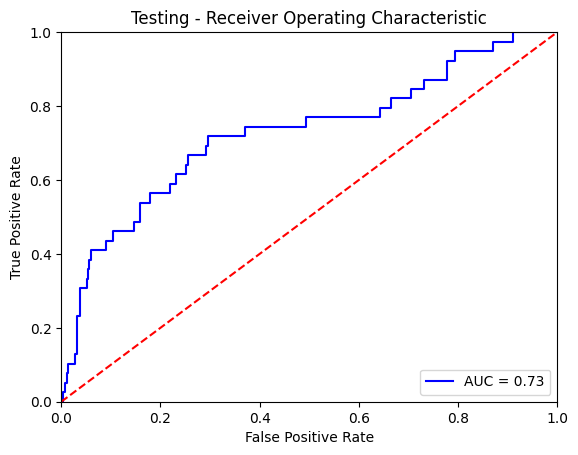

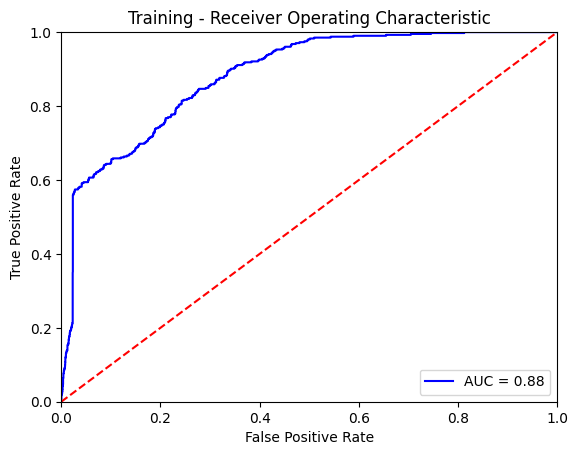

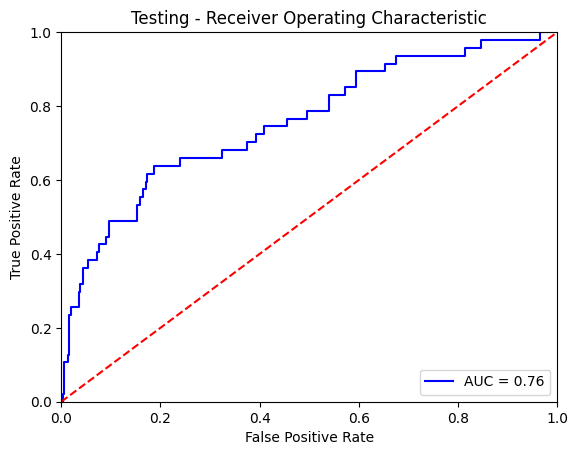

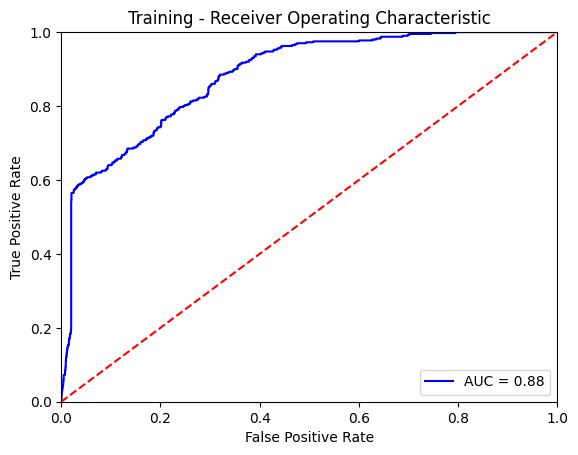

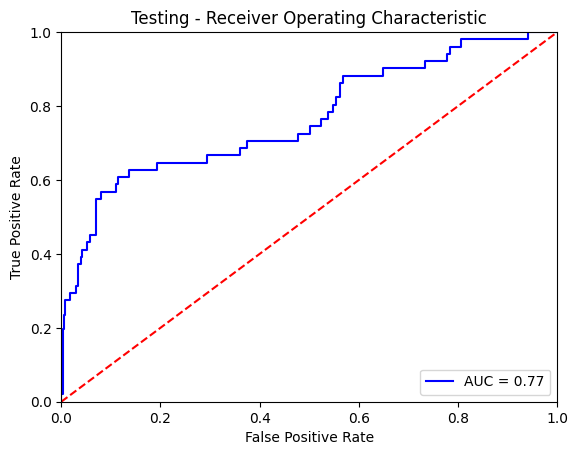

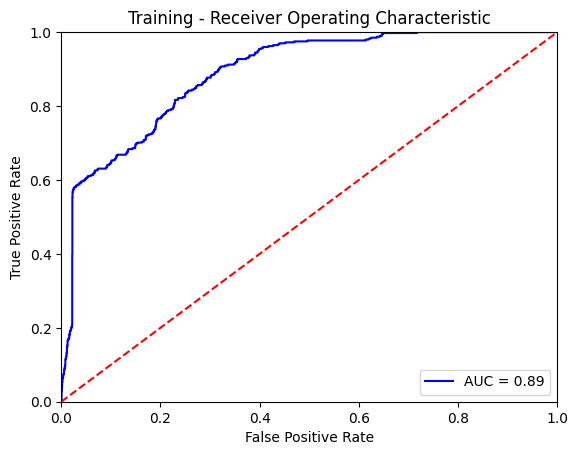

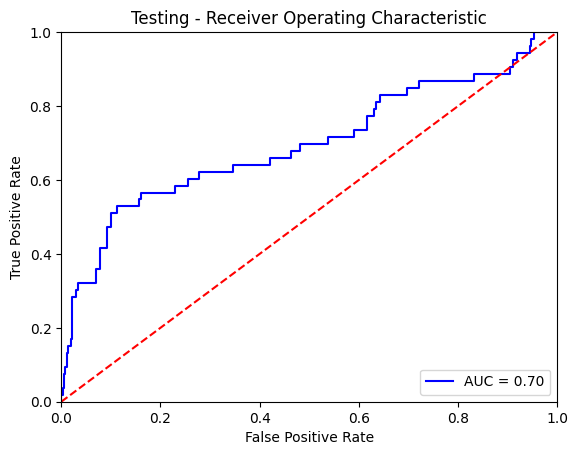

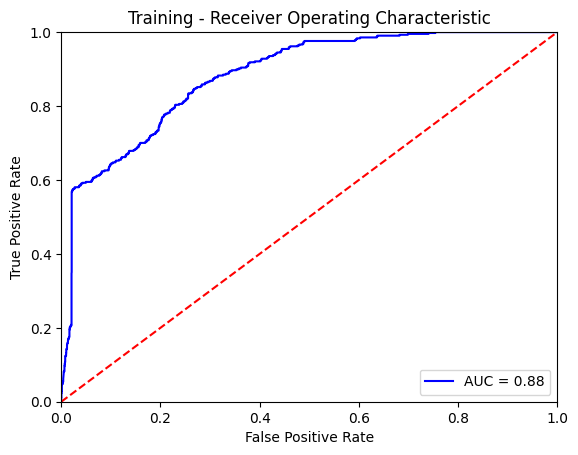

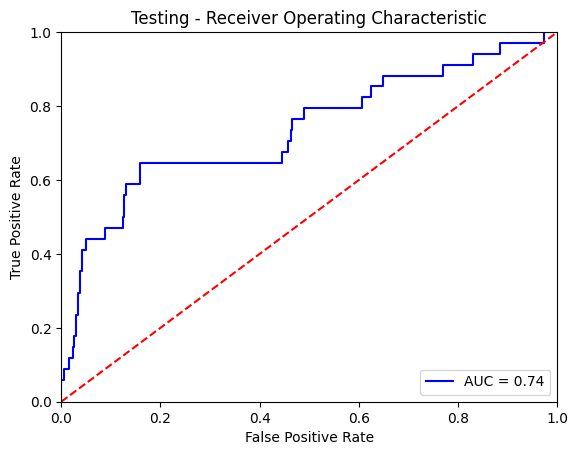

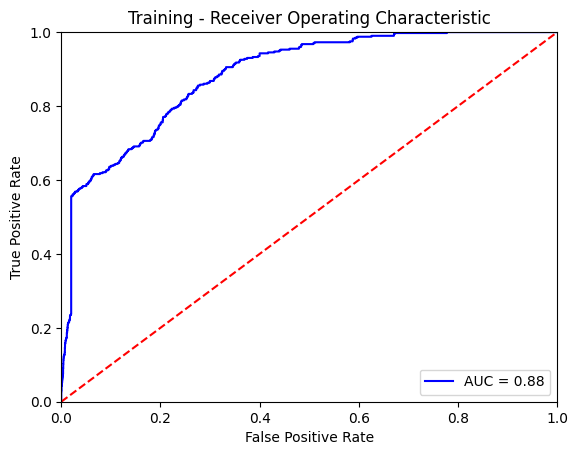

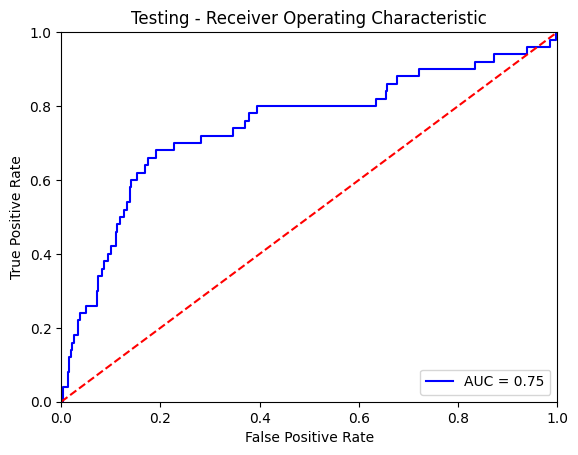

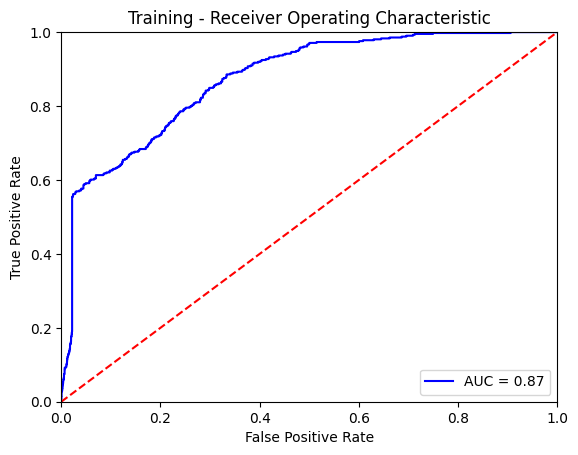

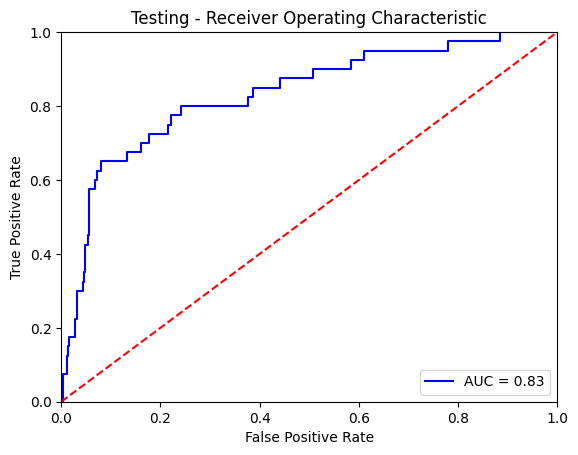

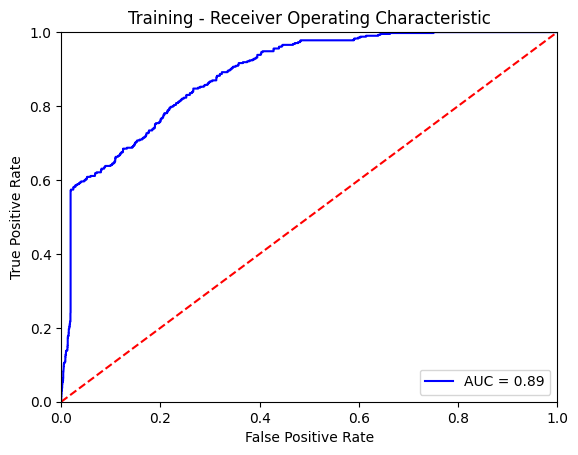

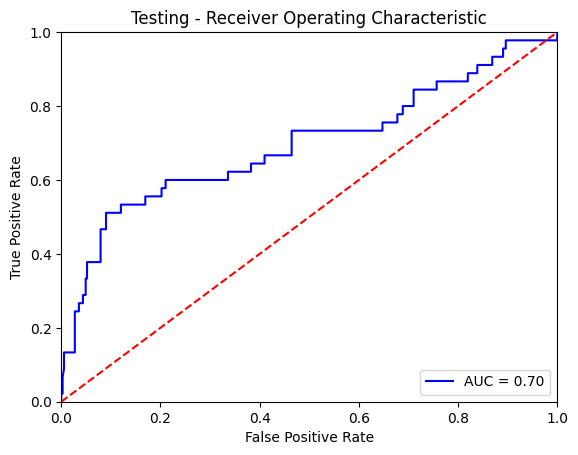

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 25 21:51:20 2018

@author: abinaya
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, roc_auc_score
import os
from datetime import datetime

from evaluate_classifier_performance import evaluate_classifier_performance

### Support Vector Machine Model

C_list = np.linspace(0.5, 2.0, 4)  # 減少參數組合
gamma_list = np.linspace(0.01, 0.05, 3)

# 儲存每一折的表現
AVG_ACC = np.zeros(shape=[len(C_list), len(gamma_list)])

# 處理 10-fold 資料
for fold in range(1, 11):  # 從 fold 1 到 fold 10
    print(f"---Processing Fold: {fold}")
    
    # 讀取該折的訓練和測試資料
    df_train = pd.read_csv(f'Data/bank-additional-dataset/kfold_fold_{fold}_train.csv')
    df_test = pd.read_csv(f'Data/bank-additional-dataset/kfold_fold_{fold}_test.csv')

    if 'Unnamed: 0' in df_train.columns:
        del df_train['Unnamed: 0']
    if 'Unnamed: 0' in df_test.columns:
        del df_test['Unnamed: 0']

    df_train_class = pd.DataFrame(df_train['y'])    
    df_train_features = df_train.loc[:, df_train.columns != 'y']
    df_test_class = pd.DataFrame(df_test['y'])
    df_test_features = df_test.loc[:, df_test.columns != 'y']

    # 參數選擇
    x_count = 0
    for c_value in C_list:
        y_count = 0
        for gamma_value in gamma_list:
            print(c_value, gamma_value)
            svm_model = SVC(C=c_value, gamma=gamma_value, kernel='rbf', class_weight='balanced')
            svm_model.fit(df_train_features, df_train_class.values.ravel())
            score_value = svm_model.score(df_test_features, df_test_class.values.ravel())
            AVG_ACC[x_count, y_count] += score_value
            y_count += 1
        x_count += 1

# 計算平均表現
AVG_ACC /= 10  # 平均 10 折的表現
max_ind = np.unravel_index(np.argmax(AVG_ACC, axis=None), AVG_ACC.shape)

chosen_C = C_list[max_ind[0]]
chosen_gamma = gamma_list[max_ind[1]]

print("By Cross Validation - Chosen C for SVM: ", chosen_C)
print("By Cross Validation - Chosen Gamma for SVM: ", chosen_gamma)

# 用來儲存總的混淆矩陣和評估指標
train_conf_matrix_total = np.zeros((2, 2))  # 訓練混淆矩陣總和
test_conf_matrix_total = np.zeros((2, 2))   # 測試混淆矩陣總和
train_metrics = {
    'accuracy': [],
    'precision_class0': [],
    'precision_class1': [],
    'recall_class0': [],
    'recall_class1': [],
    'f1_class0': [],
    'f1_class1': [],
    'weighted_f1': [],
    'auc': []
}
test_metrics = {
    'accuracy': [],
    'precision_class0': [],
    'precision_class1': [],
    'recall_class0': [],
    'recall_class1': [],
    'f1_class0': [],
    'f1_class1': [],
    'weighted_f1': [],
    'auc': []
}

# 用最佳參數在每一折上訓練和測試
for fold in range(1, 11):
    print(f"---Final Model on Fold: {fold}")
    
    df_train = pd.read_csv(f'Data/bank-additional-dataset/kfold_fold_{fold}_train.csv')
    df_test = pd.read_csv(f'Data/bank-additional-dataset/kfold_fold_{fold}_test.csv')

    if 'Unnamed: 0' in df_train.columns:
        del df_train['Unnamed: 0']
    if 'Unnamed: 0' in df_test.columns:
        del df_test['Unnamed: 0']

    df_train_class = pd.DataFrame(df_train['y'])    
    df_train_features = df_train.loc[:, df_train.columns != 'y']
    df_test_class = pd.DataFrame(df_test['y'])
    df_test_features = df_test.loc[:, df_test.columns != 'y']

    svm_model_final = SVC(C=chosen_C, gamma=chosen_gamma, kernel='rbf', class_weight='balanced', probability=True)
    svm_model_final.fit(df_train_features, df_train_class.values.ravel())
    
    predicted_train = svm_model_final.predict(df_train_features)
    predicted_test = svm_model_final.predict(df_test_features)
    predicted_prob_train = svm_model_final.predict_proba(df_train_features)
    predicted_prob_test = svm_model_final.predict_proba(df_test_features)

    # 計算混淆矩陣並累加
    train_conf_matrix = confusion_matrix(df_train_class, predicted_train)
    test_conf_matrix = confusion_matrix(df_test_class, predicted_test)
    train_conf_matrix_total += train_conf_matrix
    test_conf_matrix_total += test_conf_matrix

    # 計算評估指標並儲存
    train_accuracy = accuracy_score(df_train_class, predicted_train)
    test_accuracy = accuracy_score(df_test_class, predicted_test)

    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(df_train_class, predicted_train, average=None)
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(df_test_class, predicted_test, average=None)

    train_weighted_f1 = np.average(train_f1, weights=np.bincount(df_train_class.values.ravel()))
    test_weighted_f1 = np.average(test_f1, weights=np.bincount(df_test_class.values.ravel()))

    train_auc = roc_auc_score(df_train_class, predicted_prob_train[:, 1])
    test_auc = roc_auc_score(df_test_class, predicted_prob_test[:, 1])

    # 儲存訓練指標
    train_metrics['accuracy'].append(train_accuracy)
    train_metrics['precision_class0'].append(train_precision[0])
    train_metrics['precision_class1'].append(train_precision[1])
    train_metrics['recall_class0'].append(train_recall[0])
    train_metrics['recall_class1'].append(train_recall[1])
    train_metrics['f1_class0'].append(train_f1[0])
    train_metrics['f1_class1'].append(train_f1[1])
    train_metrics['weighted_f1'].append(train_weighted_f1)
    train_metrics['auc'].append(train_auc)

    # 儲存測試指標
    test_metrics['accuracy'].append(test_accuracy)
    test_metrics['precision_class0'].append(test_precision[0])
    test_metrics['precision_class1'].append(test_precision[1])
    test_metrics['recall_class0'].append(test_recall[0])
    test_metrics['recall_class1'].append(test_recall[1])
    test_metrics['f1_class0'].append(test_f1[0])
    test_metrics['f1_class1'].append(test_f1[1])
    test_metrics['weighted_f1'].append(test_weighted_f1)
    test_metrics['auc'].append(test_auc)

    # 調用原始的 evaluate_classifier_performance 函數（如果需要）
    evaluate_classifier_performance(df_train_class, predicted_train, predicted_prob_train, 
                                    df_test_class, predicted_test, predicted_prob_test, 'y')

# 計算平均指標
train_metrics_avg = {key: np.mean(values) for key, values in train_metrics.items()}
test_metrics_avg = {key: np.mean(values) for key, values in test_metrics.items()}

# 打印最終結果（分行顯示）
print("\nFINAL RESULTS:")
print(f"Chosen Parameters: C = {chosen_C}, Gamma = {chosen_gamma}")

print("\nTraining Confusion Matrix (Sum of 10 Folds): TP = {0}, FP = {1}, FN = {2}, TN = {3}".format(
    int(train_conf_matrix_total[1, 1]), int(train_conf_matrix_total[0, 1]), 
    int(train_conf_matrix_total[1, 0]), int(train_conf_matrix_total[0, 0])
))
print("Testing Confusion Matrix (Sum of 10 Folds): TP = {0}, FP = {1}, FN = {2}, TN = {3}".format(
    int(test_conf_matrix_total[1, 1]), int(test_conf_matrix_total[0, 1]), 
    int(test_conf_matrix_total[1, 0]), int(test_conf_matrix_total[0, 0])
))

print("\nAverage Metrics (10 Folds):")
print(f"Train - Accuracy: {train_metrics_avg['accuracy']:.4f}, Weighted F1 Score: {train_metrics_avg['weighted_f1']:.4f}, AUC: {train_metrics_avg['auc']:.4f}")
print(f"Test  - Accuracy: {test_metrics_avg['accuracy']:.4f}, Weighted F1 Score: {test_metrics_avg['weighted_f1']:.4f}, AUC: {test_metrics_avg['auc']:.4f}")

print("\nClass-Specific Metrics (Average of 10 Folds):")
print(f"Train - Class 0: Precision = {train_metrics_avg['precision_class0']:.4f}, Recall = {train_metrics_avg['recall_class0']:.4f}, Class 0 F1 Score = {train_metrics_avg['f1_class0']:.4f}")
print(f"Train - Class 1: Precision = {train_metrics_avg['precision_class1']:.4f}, Recall = {train_metrics_avg['recall_class1']:.4f}, Class 1 F1 Score = {train_metrics_avg['f1_class1']:.4f}")
print(f"Test  - Class 0: Precision = {test_metrics_avg['precision_class0']:.4f}, Recall = {test_metrics_avg['recall_class0']:.4f}, Class 0 F1 Score = {test_metrics_avg['f1_class0']:.4f}")
print(f"Test  - Class 1: Precision = {test_metrics_avg['precision_class1']:.4f}, Recall = {test_metrics_avg['recall_class1']:.4f}, Class 1 F1 Score = {test_metrics_avg['f1_class1']:.4f}")

# 儲存最終結果（分行寫入 CSV）
output_file = 'svm_final_results.csv'
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# 準備分行寫入的內容
result_lines = [
    f"Chosen Parameters,C = {chosen_C},Gamma = {chosen_gamma}",
    f"Training Confusion Matrix (Sum of 10 Folds),TP = {int(train_conf_matrix_total[1, 1])},FP = {int(train_conf_matrix_total[0, 1])},FN = {int(train_conf_matrix_total[1, 0])},TN = {int(train_conf_matrix_total[0, 0])}",
    f"Testing Confusion Matrix (Sum of 10 Folds),TP = {int(test_conf_matrix_total[1, 1])},FP = {int(test_conf_matrix_total[0, 1])},FN = {int(test_conf_matrix_total[1, 0])},TN = {int(test_conf_matrix_total[0, 0])}",
    f"Average Metrics (10 Folds),",
    f"Train,Accuracy = {train_metrics_avg['accuracy']:.4f},Weighted F1 Score = {train_metrics_avg['weighted_f1']:.4f},AUC = {train_metrics_avg['auc']:.4f}",
    f"Test,Accuracy = {test_metrics_avg['accuracy']:.4f},Weighted F1 Score = {test_metrics_avg['weighted_f1']:.4f},AUC = {test_metrics_avg['auc']:.4f}",
    f"Class-Specific Metrics (Average of 10 Folds),",
    f"Train - Class 0,Precision = {train_metrics_avg['precision_class0']:.4f},Recall = {train_metrics_avg['recall_class0']:.4f},Class 0 F1 Score = {train_metrics_avg['f1_class0']:.4f}",
    f"Train - Class 1,Precision = {train_metrics_avg['precision_class1']:.4f},Recall = {train_metrics_avg['recall_class1']:.4f},Class 1 F1 Score = {train_metrics_avg['f1_class1']:.4f}",
    f"Test - Class 0,Precision = {test_metrics_avg['precision_class0']:.4f},Recall = {test_metrics_avg['recall_class0']:.4f},Class 0 F1 Score = {test_metrics_avg['f1_class0']:.4f}",
    f"Test - Class 1,Precision = {test_metrics_avg['precision_class1']:.4f},Recall = {test_metrics_avg['recall_class1']:.4f},Class 1 F1 Score = {test_metrics_avg['f1_class1']:.4f}",
    f"Timestamp,{timestamp}",
    ""  # 空行分隔每次運行結果
]

# 寫入 CSV 檔案（追加模式）
with open(output_file, 'a') as f:
    # 如果檔案是空的，寫入標頭（可選）
    if os.path.getsize(output_file) == 0:
        f.write("Section,Value1,Value2,Value3,Value4\n")
    # 寫入分行結果
    for line in result_lines:
        f.write(line + "\n")

print(f"\nFinal results have been saved to {output_file}")